# 例1

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    #激活函数
    #作用：根据输入的值返回一个连续值，在0-1之间
    return 1/(1+np.exp(x))

In [3]:
class Neuron:
    #神经元功能：将输入结果*权重+偏置，然后通过激活函数
    def __init__(self,weight,bias):
        self.weight=weight
        self.bias=bias
    def feedforward(self,inputs):
        total=np.dot(self.weight,inputs)+self.bias
        return sigmoid(total)

In [14]:
class OurNeuralNetwork:
    '''
    此神经网络包含：
    2个输入
    一个隐藏层包含两个神经元（h1，h2）
    一个输出层包含一个神经元(o1)
    每个神经元都有相同的权重和偏置
    '''
    def __init__(self):
        weight=np.array([0,1])#默认的权重和偏差
        bias=0
        
        self.h1=Neuron(weight,bias)
        self.h2=Neuron(weight,bias)
        self.o1=Neuron(weight,bias)
        
    def feedforword(self,x):
        out_h1 = self.h1.feedforward(x)#h1运算
        out_h2 = self.h2.feedforward(x)#h2运算
        
        out_o1 = self.o1.feedforward(np.array([out_h1,out_h2]))#输出层运算，输入值为隐藏层的输出
        return out_o1

In [36]:
def Mse_loss(y_true,y_pred):
    return ((y_true-y_pred)**2).mean()

In [37]:
import numpy as np

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.263
Epoch 10 loss: 0.141
Epoch 20 loss: 0.086
Epoch 30 loss: 0.062
Epoch 40 loss: 0.048
Epoch 50 loss: 0.039
Epoch 60 loss: 0.033
Epoch 70 loss: 0.028
Epoch 80 loss: 0.024
Epoch 90 loss: 0.021
Epoch 100 loss: 0.019
Epoch 110 loss: 0.017
Epoch 120 loss: 0.016
Epoch 130 loss: 0.014
Epoch 140 loss: 0.013
Epoch 150 loss: 0.012
Epoch 160 loss: 0.011
Epoch 170 loss: 0.011
Epoch 180 loss: 0.010
Epoch 190 loss: 0.009
Epoch 200 loss: 0.009
Epoch 210 loss: 0.008
Epoch 220 loss: 0.008
Epoch 230 loss: 0.008
Epoch 240 loss: 0.007
Epoch 250 loss: 0.007
Epoch 260 loss: 0.007
Epoch 270 loss: 0.006
Epoch 280 loss: 0.006
Epoch 290 loss: 0.006
Epoch 300 loss: 0.006
Epoch 310 loss: 0.005
Epoch 320 loss: 0.005
Epoch 330 loss: 0.005
Epoch 340 loss: 0.005
Epoch 350 loss: 0.005
Epoch 360 loss: 0.005
Epoch 370 loss: 0.004
Epoch 380 loss: 0.004
Epoch 390 loss: 0.004
Epoch 400 loss: 0.004
Epoch 410 loss: 0.004
Epoch 420 loss: 0.004
Epoch 430 loss: 0.004
Epoch 440 loss: 0.004
Epoch 450 loss: 0.004

In [38]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Emily: 0.965
Frank: 0.039


*****

# Neural Networks Tutorial – A Pathway to Deep Learning

## The artificial neuron

In [40]:
import matplotlib.pylab as plt
import numpy as np

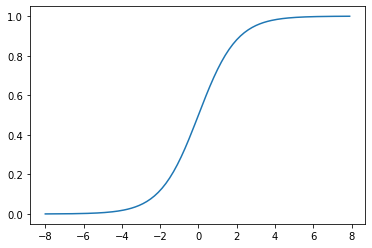

In [41]:
x = np.arange(-8,8,0.1)
f=1/(1+np.exp(-x))
plt.plot(x,f)
plt.show()

sigmoid函数不是阶跃函数而是一个平滑的函数，所以它有导数，这对于梯度下降算法很重要

## Nodes

某些神经元输出是其他神经元的输出，这通常被称为连接层。  
每个神经元接收到多个加权输入，通过将这些加权输入的总和输入激活函数并产生这个神经元的输出  
![神经元](http://adventuresinmachinelearning.com/wp-content/uploads/2017/03/Node-diagram-300x125.jpg)

将以下式子输入节点，并通过激活函数后，  
\begin{equation*}
 x_1w_1 + x_2w_2 + x_3w_3 + b
 \end{equation*}
得到输出：  
\begin{equation*}
h_{w,b}(X)
 \end{equation*}


其中$w_i$就是权重，$b$为该节点的偏置，可以使此节点更容易触发或不触发

## bias

极其简单的例子，观察改变权重对节点输出值的影响

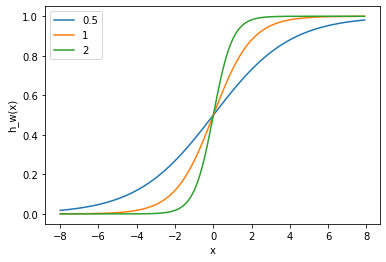

In [46]:
w1 = 0.5
w2 = 1
w3 = 2
l1 = '0.5'
l2 = '1'
l3 = '2'
for w, l in [(w1,l1),(w2,l2),(w3,l3)]:
    f = 1/(1 + np.exp(-(x*w)))
    plt.plot(x,f,label=l)
    plt.legend()
plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.show()

可以看到权重会改变激活函数的斜率，接下来查看偏置对输出的影响
![](http://adventuresinmachinelearning.com/wp-content/uploads/2017/03/Simple-node-with-bias-300x126.png)

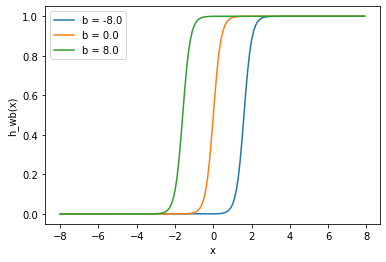

In [47]:
w = 5.0
b1 = -8.0
b2 = 0.0
b3 = 8.0
l1 = 'b = -8.0'
l2 = 'b = 0.0'
l3 = 'b = 8.0'
for b, l in [(b1, l1), (b2, l2), (b3, l3)]:
    f = 1 / (1 + np.exp(-(x*w+b)))
    plt.plot(x, f, label=l)
plt.xlabel('x')
plt.ylabel('h_wb(x)')
plt.legend(loc=2)
plt.show()

可以发现通过改变偏置$b$，可以控制节点何时激活

## Putting together the structure

前面的描述告诉了你单个神经元是如何运作的，下面介绍几个常见的层  
![](http://adventuresinmachinelearning.com/wp-content/uploads/2017/03/Three-layer-network-300x158.png)  
输入层：输入数据的层，由各个样本组成  
隐藏层：既不是输入层也不是输出层的层既隐藏层，本例中只有一个隐藏层   
输出层：输出数据的层，接收隐藏层的输出并通过激活函数计算出输出  

## The notation

下面解释一些符号，便于理解后面的式子

>权重：${w_{ij}}^{(l)}$，其中$i$代表$l+1$层中的节点，$j$代表$l$层的节点  

因此，对于连接1层的节点1与2层的节点2的权重，表示为${w_{21}}^{(1)}$  。你可能会觉得i和j反了，但是这样后面添加偏置时会更容易解释

>偏置：${b_i}^{(l)}$，其中$i$代表$l+1$层的节点数，其他与权重相同

故第1层的偏置与第二层的节点的权重表示为${b_2}^{(1)}$  。在上图可以看到，上一层的偏置会连接到下一层的所有节点，它通常会被设定成1，

**所有的**${w_{ji}}^{(1)}$**和**${b_i}^{(l)}$**值都要在ANN的训练阶段中计算**

>输出值：${h_j}^{(l)}$,其中$j$表示$l$层的节点。

故上图第二层第二个节点的输出为${h_2}^{(2)}$

理清所有符号后，是时候在已知权重与输入时计算输出了，我们称这个过程为前馈传递(feed-forward pass or process)

# The feed-forward pass

![](http://adventuresinmachinelearning.com/wp-content/uploads/2017/03/Three-layer-network-300x158.png) 

上图例子中的前馈传递计算公式：

\begin{align}
 h_1^{(2)} &= f(w_{11}^{(1)}x_1 + w_{12}^{(1)} x_2 + w_{13}^{(1)} x_3 + b_1^{(1)}) \\
 h_2^{(2)} &= f(w_{21}^{(1)}x_1 + w_{22}^{(1)} x_2 + w_{23}^{(1)} x_3 + b_2^{(1)}) \\
 h_3^{(2)} &= f(w_{31}^{(1)}x_1 + w_{32}^{(1)} x_2 + w_{33}^{(1)} x_3 + b_3^{(1)}) \\
 h_{W,b}(x) &= h_1^{(3)} = f(w_{11}^{(2)}h_1^{(2)} + w_{12}^{(2)} h_2^{(2)} + w_{13}^{(2)} h_3^{(2)} + b_1^{(2)})
 \end{align}

## A feed-forward example

下面我们用python实现计算上图神经网络的输出，
首先用矩阵表示第一层与第二层之间的权重：

\begin{equation}
 W^{(1)} =
 \begin{pmatrix}
 w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)} \\
 w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)} \\
 w_{31}^{(1)} & w_{32}^{(1)} & w_{33}^{(1)} \\
 \end{pmatrix}
 \end{equation}

In [54]:
import numpy as np
w1=np.array([[0.2,0.25,0.3],[0.4,0.45,0.5],[0.6,0.65,0.7]])

In [55]:
w1

array([[0.2 , 0.25, 0.3 ],
       [0.4 , 0.45, 0.5 ],
       [0.6 , 0.65, 0.7 ]])

同样的，用矩阵表示第二层与第三层之间的权重：

\begin{equation}
 W^{(2)} =
 \begin{pmatrix}
 w_{11}^{(2)} & w_{12}^{(2)} & w_{13}^{(2)}
 \end{pmatrix}
 \end{equation}

In [64]:
w2=np.zeros((1,3))
w2[0,:]=np.array([0.5,0.6,0.7])

In [65]:
w2

array([[0.5, 0.6, 0.7]])

添加第一层和第二层对下一层的偏置：

In [66]:
b1 = np.array([0.5,0.6,0.8])
b2 = np.array([0.2])

设置激活函数：(本例中为sigmoid函数)

In [67]:
def f(x):
    return 1 / (1 + np.exp(-x))

## Our first attempt at a feed-forward function

下面是用非常简单的循环嵌套计算的神经网络，后面会有更高效的计算方式

In [83]:
def simple_looped_nn_calc(n_layers,x,w,b):
    for l in range(n_layers-1):
        #设置每层权重将乘输入数组，若是第一层则乘x，若不是第一层则乘上一层的输出
        if l == 0:
            node_in = x
        else:
            node_in = h
        #为l+1层的输出设置
        h = np.zeros((w[l].shape[0],))
        #循环权重的每一行
        for i in range(w[l].shape[0]):
            #设置输入激活函数的变量
            f_sum = 0
            #循环权重的每一列
            for j in range(w[l].shape[1]):
                f_sum += w[l][i][j] * node_in[j]
            #添加偏置
            f_sum += b[l][i]
            #最终代入激活函数计算输出
            h[i] = f(f_sum)
    return h

In [79]:
w = [w1,w2]
b = [b1,b2]
x = [1.5, 2, 3]

In [84]:
simple_looped_nn_calc(3,x,w,b)

array([0.87324108])

## A more efficient implementation

使用循环计算前馈网络效率很低，后面会介绍更有效率的方式，可以使用%timeit来测试算法效率

In [85]:
%timeit simple_looped_nn_calc(3,x,w,b)

24.4 µs ± 284 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Vectorisation in neural networks

![](http://adventuresinmachinelearning.com/wp-content/uploads/2017/03/Three-layer-network-300x158.png) 

向量化可以使方程更简洁并使计算更有效率。  
首先介绍新符号： $z_{i}^{(l)}$，它是$l$层第$i$个节点的输入，包括偏置。  
所以第二层的第一个节点的$z$可以表示成：  
$$z_{1}^{(2)} = w_{11}^{(1)}x_1 + w_{12}^{(1)} x_2 + w_{13}^{(1)} x_3 + b_1^{(1)} = \sum_{j=1}^{n} w_{ij}^{(1)}x_i + b_{i}^{(1)}$$

其中$n$代表第一层的节点数，故示例网络的方程可以简化为：
\begin{align}
 z^{(2)} &= W^{(1)} x + b^{(1)} \\
 h^{(2)} &= f(z^{(2)}) \\
 z^{(3)} &= W^{(2)} h^{(2)} + b^{(2)} \\
 h_{W,b}(x) &= h^{(3)} = f(z^{(3)})
 \end{align}

通过推广，任意层的前向传播计算为：
\begin{align}
 z^{(l+1)} &= W^{(l)} h^{(l)} + b^{(l)}   \\
 h^{(l+1)} &= f(z^{(l+1)})
 \end{align}

## Matrix multiplication

展开$z^{(l+1)} = W^{(l)} h^{(l)} + b^{(l)}$在输入层发生的事：
\begin{align}
 z^{(2)} &=
 \begin{pmatrix}
 w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)} \\
 w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)} \\
 w_{31}^{(1)} & w_{32}^{(1)} & w_{33}^{(1)} \\
 \end{pmatrix}
 \begin{pmatrix}
 x_{1} \\
 x_{2} \\
 x_{3} \\
 \end{pmatrix} +
 \begin{pmatrix}
 b_{1}^{(1)} \\
 b_{2}^{(1)} \\
 b_{3}^{(1)} \\
 \end{pmatrix} \\
 &=
 \begin{pmatrix}
 w_{11}^{(1)}x_{1} + w_{12}^{(1)}x_{2} + w_{13}^{(1)}x_{3} \\
 w_{21}^{(1)}x_{1} + w_{22}^{(1)}x_{2} + w_{23}^{(1)}x_{3} \\
 w_{31}^{(1)}x_{1} + w_{32}^{(1)}x_{2} + w_{33}^{(1)}x_{3} \\
 \end{pmatrix} +
 \begin{pmatrix}
 b_{1}^{(1)} \\
 b_{2}^{(1)} \\
 b_{3}^{(1)} \\
 \end{pmatrix} \\
 &=
 \begin{pmatrix}
 w_{11}^{(1)}x_{1} + w_{12}^{(1)}x_{2} + w_{13}^{(1)}x_{3} + b_{1}^{(1)} \\
 w_{21}^{(1)}x_{1} + w_{22}^{(1)}x_{2} + w_{23}^{(1)}x_{3} + b_{2}^{(1)} \\
 w_{31}^{(1)}x_{1} + w_{32}^{(1)}x_{2} + w_{33}^{(1)}x_{3} + b_{3}^{(1)} \\
 \end{pmatrix} \\
 \end{align}

故更有效率的函数为：

In [87]:
def matrix_feed_forward_calc(n_layers,x,w,b):
    for l in range(n_layers-1):
        if l == 0:
            node_in = x
        else:
            node_in = h
        z = w[l].dot(node_in) + b[l]
        h = f(z)
    return h

In [88]:
%timeit matrix_feed_forward_calc(3,x,w,b)

10.8 µs ± 46.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


下面我们将使用梯度下降和反向传播实际的构建一个神经网络来完成一个分类预测任务

******

# Gradient descent and optimisation

监督学习的目的就是通过改变权重来最小化预测误差，那么如何改变权重可以使误差减小就成了我们要考虑的问题  
![](http://adventuresinmachinelearning.com/wp-content/uploads/2017/03/Gradient-descent-300x156.jpg)

如上图，这是输入值的权重与最终的误差的函数关系，当我们随机选择了一个权重$w$在点1上，我们希望使权重到达点3来最小化误差的过程就叫做梯度下降（gradient desent）。梯度就是误差曲线在该点的斜率。显然，在斜率为负时增大权重，在斜率为正时减小权重可以使误差最小。而我们希望在远离最低点，也就是斜率较大的时候更快的接近最低点，相反则更慢的接近最低点时，则设置每次权重的改动值与斜率相关。故$w$更新为：
\begin{equation}
 w_{new} = w_{old} – \alpha * \nabla error
 \end{equation}

其中，$\nabla error$是误差曲线的斜率，$\alpha$是步长，它决定了你的函数的收敛速度。当收敛到接近最小值时函数收敛的速度会变得很慢，非常接近最小值，这时候我们希望结束迭代，就可以设置一个精度使当梯度变化小于精度时结束迭代

## A simple example in code

一个梯度下降解决$f(x) = x^4 – 3x^3 + 2$最小值的例子，(这个函数的斜率可以计算出，但现实问题的函数大多是无法计算的)我们可以轻易的计算出它的最小值是 $x = 2.25$

In [94]:
x_old = 0
x_new = 6
gamma = 0.01
precision = 0.00001
def d_f(x):
    y = 4 * x ** 3 - 9 * x ** 2
    return y
while abs(x_new-x_old)>precision:
    x_old = x_new
    x_new += -gamma * d_f(x_old)
print('最小值是：',x_new)

最小值是： 2.2499646074278457


我们计算神经网络梯度的方法是通过**反向传播方法**，但首先要更仔细的研究误差函数

## The cost function

成本函数允许我们减小误差并防止过拟合

\begin{align}
 J(w,b,x,y) &= \frac{1}{2} \parallel y^z – h^{(n_l)}(x^z) \parallel ^2 \\
 &= \frac{1}{2} \parallel y^z – y_{pred}(x^z) \parallel ^2
 \end{align}

两条垂线代表误差的$L^2$范数，即所谓的平方差（SSE）。

而上面的成本函数是针对单个$（x，y）$训练的，我们希望在所有的m个样本中训练最小化成本函数，所以我们希望找到所有训练样本的最小**均方误差（MSE）**：

\begin{align}
 J(w,b) &= \frac{1}{m} \sum_{z=0}^m \frac{1}{2} \parallel y^z – h^{(n_l)}(x^z) \parallel ^2 \\
 &= \frac{1}{m} \sum_{z=0}^m J(W, b, x^{(z)}, y^{(z)})
 \end{align}

确定了损失函数后，就可以探究一下神经网络中的梯度下降

## Gradient descent in neural networks

神经网络中对每个权重与偏置的梯度下降：
\begin{align}
 w_{ij}^{(l)} &= w_{ij}^{(l)} – \alpha \frac{\partial}{\partial w_{ij}^{(l)}} J(w,b) \\
 b_{i}^{(l)} &= b_{i}^{(l)} – \alpha \frac{\partial}{\partial b_{i}^{(l)}} J(w,b)
 \end{align}

本质上与 $w_{new} = w_{old} – \alpha * \nabla error$相同

## A two dimensional gradient descent example

![](http://adventuresinmachinelearning.com/wp-content/uploads/2017/03/Two-dimensional-gradient-descent-300x203.jpg)

## **Backpropagation in depth**

反向传播的数学原理：
![](http://adventuresinmachinelearning.com/wp-content/uploads/2017/03/Three-layer-network-300x158.png) 
首先回顾一下第三部分学到的一些基本方法：

输出可以被这样计算：
\begin{equation}
 h_{W,b}(x) = h_1^{(3)} = f(w_{11}^{(2)}h_1^{(2)} + w_{12}^{(2)} h_2^{(2)} + w_{13}^{(2)} h_3^{(2)} + b_1^{(2)})
 \end{equation}
我们也可以用 $h_1^{(3)} = f(z_1^{(2)})$简化方程：
\begin{equation}
z_{1}^{(2)} = w_{11}^{(2)}h_1^{(2)} + w_{12}^{(2)} h_2^{(2)} + w_{13}^{(2)} h_3^{(2)} + b_1^{(2)}
 \end{equation}

假设我们想知道 $w_{12}^{(2)}$的改变对成本函数$J$造成的影响的大小，则需要计算 $\frac {\partial J}{\partial w_{12}^{(2)}}$，而为了计算这个偏导数，我们需要链式求导：
\begin{equation}
\frac {\partial J}{\partial w_{12}^{(2)}} = \frac {\partial J}{\partial h_1^{(3)}} \frac {\partial h_1^{(3)}}{\partial z_1^{(2)}} \frac {\partial z_1^{(2)}}{\partial w_{12}^{(2)}}
 \end{equation}

让我们从最后一个分式$\frac {\partial z_1^{(2)}}{\partial w_{12}^{(2)}}$开始，计算偏导数得：
\begin{align}
 \frac {\partial z_1^{(2)}}{\partial w_{12}^{(2)}} &= \frac {\partial}{\partial w_{12}^{(2)}} (w_{11}^{(1)}h_1^{(2)} + w_{12}^{(1)} h_2^{(2)} + w_{13}^{(1)} h_3^{(2)} + b_1^{(1)})\\
 &= \frac {\partial}{\partial w_{12}^{(2)}} (w_{12}^{(1)} h_2^{(2)})\\
 &= h_2^{(2)}
 \end{align}
 最终等于第二层的第二个节点的输出

下面是中间的分式：$\frac {\partial h_1^{(3)}}{\partial z_1^{(2)}}$，这是$h_1^{(3)}$输出层的偏导数，由于这个函数需要可导，故神经网络的激活函数需要可微。故sigmoid函数的导数为：
\begin{align}
\frac {\partial h}{\partial z} = f'(z) = f(z)(1-f(z))
 \end{align}

下面我们需要计算出第一个分式$\frac {\partial J}{\partial h_1^{(3)}}$，记住$J(w,b,x,y)$是MSE损失函数，在此例中公式为：$J(w,b,x,y) = \frac{1}{2} \parallel y_1 – h_1^{(3)}(z_1^{(2)}) \parallel ^2$,其中y_1是训练目标。再次使用链式法则：
\begin{align}
 &Let\ u = \parallel y_1 – h_1^{(3)}(z_1^{(2)}) \parallel\ and\ J = \frac {1}{2} u^2\\
 &Using\ \frac {\partial J}{\partial h} = \frac {\partial J}{\partial u} \frac {\partial u}{\partial h}:\\
 &\frac {\partial J}{\partial h} = -(y_1 – h_1^{(3)})
 \end{align}

******
现在我们知道了如何计算$\frac {\partial J}{\partial w_{12}^{(2)}}$，在我们看向隐藏层之前，先介绍一些简化符号和$\delta$：
\begin{align}
\delta_i^{(n_l)} = -(y_i – h_i^{(n_l)})\cdot f^\prime(z_i^{(n_l)})
 \end{align}

$i$是输出层的节点号，在我们的例子中只有一个，故在本例中$i=1$，现在我们可以将损失函数对权重的偏导写作：
\begin{align}
 \frac{\partial}{\partial W_{ij}^{(l)}} J(W,b,x, y) &= h^{(l)}_j \delta_i^{(l+1)} \\
 \end{align}
其中，输出层的$l=2$

## Propagating into the hidden layers

那么其他隐藏层呢，对于连接到输出层的$\frac{\partial J}{\partial h}=-（y_i–h_i^{（n_l）}）$的偏导是有意义的，因为可以将输出层与训练数据直接比较来算成本函数，然而更深的隐藏层并没有训练数据来计算成本函数，这时便可以使用反向传播算法。

我们已经使用链式法则完成了推导，下面可以采用更图形化的方式，需要通过网络回传的术语是$\delta_i^{（n_l）}$
![](http://adventuresinmachinelearning.com/wp-content/uploads/2017/03/Backpropagation-illustration-300x204.jpg)

在只有一个输出节点时，隐藏层的$\delta$定义为：
\begin{align}
\delta_j^{(l)} = \delta_1^{(l+1)} w_{1j}^{(l)}\ f^\prime(z_j)^{(l)}
\end{align}
其中，$j$是层$l$中的节点号。

若有多个输出节点，则需要所有连接节点的加权和：
![](http://adventuresinmachinelearning.com/wp-content/uploads/2017/03/Backpropagation-illustration-with-multiple-outputs-300x242.jpg)

从上面可以看出，输出层的每个$\delta$值都包含在用于计算$\delta_1^{（2）}$的总和中，但每个输出$\delta$都根据适当的$w_{i1}{（2）}$值进行加权。换句话说，第2层中的节点1导致了三个输出节点的误差，因此每个节点的测量误差（或成本函数值）必须“传回”到该节点的$\delta$值。现在，我们可以为隐藏层中的节点的$\delta$值开发一个通用表达式：

\begin{align}
\delta_j^{(l)} = (\sum_{i=1}^{s_{(l+1)}} w_{ij}^{(l)} \delta_i^{(l+1)})\ f^\prime(z_j^{(l)})
\end{align}

其中，$j$是层$l$中的节点号，$i$是层$l+1$中的节点号。值$s_{（l+1）}$是层$（l+1）$中的节点数。

故现在可以计算：
\begin{align}
\frac{\partial}{\partial W_{ij}^{(l)}} J(W,b,x, y) = h^{(l)}_j \delta_i^{(l+1)}
\end{align}

同理，对偏置用相同的方法推出公式：
\begin{align}
\frac{\partial}{\partial b_{i}^{(l)}} J(W,b,x, y) = \delta_i^{(l+1)}
\end{align}

现在我们知道如何处理原始梯度下降问题：
\begin{align}
 w_{ij}^{(l)} &= w_{ij}^{(l)} – \alpha \frac{\partial}{\partial w_{ij}^{(l)}} J(w,b) \\
 b_{i}^{(l)} &= b_{i}^{(l)} – \alpha \frac{\partial}{\partial b_{i}^{(l)}} J(w,b)
 \end{align}

但是要对所有权重梯度下降，我们会用到多个循环，但这种循环很慢，所以我们要将这些计算矢量化

## Vectorisation of backpropagation

\begin{align}
\delta_j^{(l)} = (\sum_{i=1}^{s_{(l+1)}} w_{ij}^{(l)} \delta_i^{(l+1)})\ f^\prime(z_j^{(l)}) = \left((W^{(l)})^T \delta^{(l+1)}\right) \bullet f'(z^{(l)})
 \end{align}

其中$\bullet$符号表示元素对元素的乘法（称为Hadamard乘积），而不是矩阵乘法。

## Implementing the gradient descent step

现在让我们再次审视我们试图最小化的总体成本函数：
\begin{align}
 J(w,b) &= \frac{1}{m} \sum_{z=0}^m J(W, b, x^{(z)}, y^{(z)})
 \end{align}
 我们可以看到整体成本函数是所有样本的成本函数的平均值

故梯度下降计算
\begin{align}
 w_{ij}^{(l)} &= w_{ij}^{(l)} – \alpha \frac{\partial}{\partial w_{ij}^{(l)}} J(w,b)\\
 W^{(l)} &= W^{(l)} – \alpha \frac{\partial}{\partial W^{(l)}} J(w,b)\\
 &= W^{(l)} – \alpha \left[\frac{1}{m} \sum_{z=1}^{m} \frac {\partial}{\partial W^{(l)}} J(w,b,x^{(z)},y^{(z)}) \right]\\
 \end{align}

我们需要一个符号来储存用来计算平均值的所有值：$\Delta W^{（l）}$，$\Delta b^{（l）}$。故在训练每个样本的迭代中有：
\begin{align}
 \Delta W^{(l)} &= \Delta W^{(l)} + \frac {\partial}{\partial W^{(l)}} J(w,b,x^{(z)},y^{(z)})\\
 &= \Delta W^{(l)} + \delta^{(l+1)} (h^{(l)})^T\\
 \Delta b^{(l)} &= \Delta b^{(1)} + \delta^{(l+1)}
 \end{align}

通过在每次迭代中执行上述操作，我们慢慢地构建前面提到的$\sum_{z=1}^{m} \frac {\partial}{\partial W^{(l)}} J(w,b,x^{(z)},y^{(z)})$（对于$b$也是如此）。
在遍历所有样本并汇总$\Delta$值后，我们将更新权重参数：
\begin{align}
 W^{(l)} &= W^{(l)} – \alpha \left[\frac{1}{m} \Delta W^{(l)} \right] \\
 b^{(l)} &= b^{(l)} – \alpha \left[\frac{1}{m} \Delta b^{(l)}\right]
 \end{align}

## The final gradient descent algorithm

最终的反向传播算法：
******
随机初始化每个层的权重 $W^{(l)}$

若迭代次数<迭代次数限制：

>1.将$\Delta W$和$\Delta b$设置为零

>2.对于样本1至m：

>>a、 在所有的$n_l$层中执行前向传播。存储激活函数输出$h^{(l)}$

>>b、 计算输出层的$\delta^{(n_l)}$值

>>c、 使用反向传播计算第2层到第1层的$\delta^{(l)}$值

>>d、 更新每个层的$\Delta W^{(l)}$和$\Delta b^{(l)}$

>3.使用以下方法执行梯度下降步骤：

>$W^{(l)} = W^{(l)} – \alpha \left[\frac{1}{m} \Delta W^{(l)} \right]$


>$b^{(l)} = b^{(l)} – \alpha \left[\frac{1}{m} \Delta b^{(l)}\right]$

******

# Implementing the neural network in Python

神经网络手写分类实例：

In [ ]:
#导入数据

In [98]:
from sklearn.datasets import load_digits
digits = load_digits()

In [102]:
digits.data.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

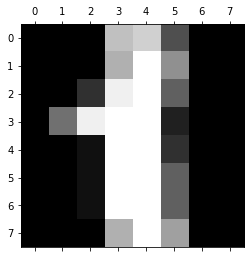

In [110]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])
plt.show()

## Scaling data

In [112]:
digits.data[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

数据输入范围从0到15，我们应该将数据归一化或标准化，这样会有助于神经网络的收敛

In [114]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()

In [116]:
X = X_scale.fit_transform(digits.data)

In [118]:
X[0,:]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

## Creating test and training datasets

In [120]:
from sklearn.model_selection import train_test_split
y = digits.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

## Setting up the output layer

In [123]:
#设置输出层，将输出的形式改为【0，0，1，0，0，0，0，0，0，0】
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y),10))
    for i in range(len(y)):
        y_vect[i,y[i]]=1
    return y_vect

In [127]:
y_test

array([2, 6, 0, 5, 0, 5, 1, 6, 5, 7, 7, 6, 5, 8, 1, 4, 3, 0, 4, 8, 0, 8,
       8, 8, 4, 3, 5, 9, 6, 5, 0, 0, 5, 8, 1, 5, 2, 6, 1, 6, 0, 8, 2, 5,
       0, 7, 8, 1, 0, 0, 5, 7, 4, 2, 0, 6, 6, 1, 9, 7, 9, 3, 4, 9, 8, 7,
       8, 9, 2, 6, 6, 4, 4, 7, 6, 2, 8, 5, 3, 4, 3, 1, 5, 7, 6, 6, 9, 6,
       4, 9, 4, 9, 0, 3, 9, 9, 8, 6, 1, 9, 3, 4, 3, 1, 8, 1, 4, 5, 0, 7,
       8, 3, 2, 5, 5, 5, 3, 4, 7, 8, 6, 8, 3, 5, 4, 8, 6, 5, 7, 7, 1, 6,
       3, 1, 0, 8, 2, 0, 1, 2, 9, 0, 3, 2, 6, 2, 8, 4, 4, 0, 6, 2, 1, 7,
       7, 1, 7, 3, 0, 6, 3, 6, 8, 3, 6, 0, 1, 8, 7, 9, 4, 0, 5, 9, 8, 1,
       0, 4, 6, 4, 5, 9, 3, 9, 8, 5, 0, 6, 7, 0, 3, 3, 7, 1, 7, 1, 5, 6,
       5, 4, 2, 8, 0, 4, 7, 7, 6, 2, 7, 2, 1, 9, 6, 3, 4, 2, 9, 8, 4, 1,
       6, 3, 9, 7, 9, 6, 0, 3, 2, 9, 4, 5, 0, 8, 5, 4, 6, 4, 2, 9, 2, 6,
       0, 2, 3, 1, 4, 6, 7, 2, 8, 3, 6, 9, 2, 8, 8, 2, 8, 7, 4, 2, 3, 9,
       5, 5, 7, 8, 4, 0, 0, 3, 7, 0, 5, 6, 8, 2, 2, 7, 7, 5, 6, 8, 2, 8,
       3, 9, 0, 5, 5, 4, 9, 9, 4, 9, 5, 3, 5, 0, 0,

In [126]:
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)

In [128]:
y_v_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

## Creating the neural network

下面具体说明神经网络的结构，对于输入层，我们有64个节点对应64个像素，那么在输出层就需要10个节点对应数字，我们也需要隐藏层来执行复杂的任务，**通常隐藏层节点数介于输入层与输出层之间**

In [129]:
#定义应该简单的网络列表来指定网络结构
nn_structure = [64,30,10]

In [130]:
#定义激活函数以及激活函数的导数
def f(x):
    return 1/(1+np.exp(-x))
def f_deriv(x):
    return f(x)*(1-f(x))

最终的反向传播算法：
******
随机初始化每个层的权重 $W^{(l)}$

若迭代次数<迭代次数限制：

>1.将$\Delta W$和$\Delta b$设置为零

>2.对于样本1至m：

>>a、 在所有的$n_l$层中执行前向传播。存储激活函数输出$h^{(l)}$

>>b、 计算输出层的$\delta^{(n_l)}$值

>>c、 使用反向传播计算第2层到第1层的$\delta^{(l)}$值

>>d、 更新每个层的$\Delta W^{(l)}$和$\Delta b^{(l)}$

>3.使用以下方法执行梯度下降步骤：

>$W^{(l)} = W^{(l)} – \alpha \left[\frac{1}{m} \Delta W^{(l)} \right]$


>$b^{(l)} = b^{(l)} – \alpha \left[\frac{1}{m} \Delta b^{(l)}\right]$

******

第一步：初始化权重，为了保证网络正确收敛，使用随机值初始化权重

In [136]:
import numpy.random as r
def setup_and_init_weights(nn_structure):
    W = {}
    b = {}
    for l in range(1,len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l],nn_structure[l-1]))#创建形状为（L，L-1）的随机矩阵
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

然后将相同形状的$\Delta W$和$\Delta b$设为0

In [137]:
import numpy.random as r
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1,len(nn_structure)):
        tri_W[l] = r.random_sample((nn_structure[l],nn_structure[l-1]))#创建形状为（L，L-1）的随机矩阵
        tri_b[l] = r.random_sample((nn_structure[l],))
    return tri_W, tri_b

然后执行前向传播

In [138]:
def feed_forward(x,W,b):
    h = {1:x}
    z = {}
    for l in range(1,len(W) + 1):
        #若是第一层则输出x，否则输入其他层的输出
        if l == 1:
            node_in = x
        else:
            node_in = h[l]
        z[l+1] = W[l].dot(node_in) + b[l]
        h[l+1] = f(z[l+1])
    return h,z

最后，计算输出层的$\delta^{(n_l)}$ 与所有隐藏层的$\delta^{(l)}$以进行反向传播

$\delta^{(n_l)} = -(y_i - h_i^{(nl)}) * f'(z_i^{(nl)})$  
$\delta^{(l)} = ((W^{(l)}.T) · \delta^{(l+1)} ) * f'(z^{(l)})$

In [139]:
def calculate_out_layer_delta(y,h_out,z_out):
    return -(y-h_out) * f_deriv(z_out)
def calculate_hidden_delta(delta_plus_1,w_1,z_1):
    return np.dot(np.transpose(w_1),delta_plus_1) * f_deriv(z_1)

现在我们可以将所有步骤合并到最终函数中

In [157]:
def train_nn(nn_structure,X,y,iter_num=3000,alpha=0.25):
    W,b=setup_and_init_weights(nn_structure)
    cnt=0#循环次数
    m=len(y)
    avg_cost_func = []
    print('Strat gradient desent for {} iterations'.format(iter_num))
    while cnt<=iter_num:
        if cnt%100 == 0:
            print('Iteration {} of {} '.format(cnt,iter_num))
        tri_W,tri_b=init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(len(y)):#遍历每个样本
            delta = {}
            #执行前向传播并返回h与z值
            h,z=feed_forward(X[i,:],W,b)
            #循环从nl-1层到1层反向传播，获取梯度
            for l in range(len(nn_structure),0,-1):
                if l == len(nn_structure):
                    delta[l]=calculate_out_layer_delta(y[i,:],h[l],z[l])#计算输出层的delta
                    avg_cost +=np.linalg.norm((y[i,:]-h[l]))#矩阵整体元素平方开根号
                else:
                    if l >1:
                        delta[l]=calculate_hidden_delta(delta[l+1],W[l],z[l])
                    tri_W[l]+=np.dot(delta[l+1][:,np.newaxis],np.transpose(h[l][:,np.newaxis]))
                    tri_b[l]+=delta[l+1]
        #对每一层的权重执行梯度下降
        for l in range(len(nn_structure)-1,0,-1):
            W[l]+= -alpha * (1.0/m*tri_W[l])
            b[l]+= -alpha * (1.0/m*tri_b[l])
        #计算平均损失
        avg_cost = 1.0/m*avg_cost
        avg_cost_func.append(avg_cost)
        cnt+=1
        
    return W,b,avg_cost_func

In [158]:
W,b,avg_cost_func = train_nn(nn_structure,X_train,y_v_train)

Strat gradient desent for 3000 iterations
Iteration 0 of 3000 
Iteration 100 of 3000 
Iteration 200 of 3000 
Iteration 300 of 3000 
Iteration 400 of 3000 
Iteration 500 of 3000 
Iteration 600 of 3000 
Iteration 700 of 3000 
Iteration 800 of 3000 
Iteration 900 of 3000 
Iteration 1000 of 3000 
Iteration 1100 of 3000 
Iteration 1200 of 3000 
Iteration 1300 of 3000 
Iteration 1400 of 3000 
Iteration 1500 of 3000 
Iteration 1600 of 3000 
Iteration 1700 of 3000 
Iteration 1800 of 3000 
Iteration 1900 of 3000 
Iteration 2000 of 3000 
Iteration 2100 of 3000 
Iteration 2200 of 3000 
Iteration 2300 of 3000 
Iteration 2400 of 3000 
Iteration 2500 of 3000 
Iteration 2600 of 3000 
Iteration 2700 of 3000 
Iteration 2800 of 3000 
Iteration 2900 of 3000 
Iteration 3000 of 3000 


In [149]:
nn_structure

[64, 30, 10]

In [150]:
X_train

array([[ 0.        , -0.33501649, -1.09493684, ...,  1.22664392,
         0.96153467, -0.19600752],
       [ 0.        , -0.33501649, -0.46382335, ...,  1.05712311,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.39616473,
         0.22793243, -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.46382335, ...,  1.56568555,
         3.16234137,  5.71923007],
       [ 0.        , -0.33501649, -0.88456568, ...,  0.20951905,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  1.56568555,
         1.93967098, -0.19600752]])

In [151]:
y_v_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

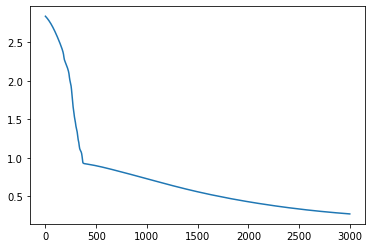

In [160]:
plt.plot(avg_cost_func)

## Assessing the accuracy of the trained model

In [165]:
def predict_y(W,b,X,n_layers):
    m = X.shape[0]
    y = np.zeros((m,))
    for i in range(m):
        h,z = feed_forward(X[i,:],W,b)
        y[i] = np.argmax(h[n_layers])
    return y

In [167]:
from sklearn.metrics import accuracy_score
y_pred = predict_y(W,b,X_test,3)
accuracy_score(y_test,y_pred)*100

92.35048678720446